#  Project1_TF-IDF +Visualization

運用TF-IDF的方式分析文檔，並用視覺化的方式呈現，並探討相關的問題。

## 前言
本人非常討厭社會科，在考學測的時候，賽對了很多提，於是想藉由統計的方式，教教莘莘學子該猜什麼答案

###目標
1. 統計出近20年學測社會科常用的字
2. 尋找這些字和答案的關系
3. 預測明年試題方向

In [9]:
import jieba
import sys

In [7]:
def openfile(filePath):
    paragraph=""
    with open(filePath,encoding = 'utf8') as f:
        for ele in f:
            ele=ele.replace(" ","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("0","").replace("(A)","").replace("(B)","").replace("(C)","").replace("(D)","").replace("，","").replace("。","")
            ele=ele.strip()
            paragraph+=ele
        return paragraph

In [5]:
def cutParagraph(uncuted):
    result = []
    file_list=uncuted
    seg_list = jieba.cut(file_list,cut_all=True)
    for seg in seg_list :
        seg = ''.join(seg.split())
        result.append(seg)
    a=" ".join(result)
    return a

In [10]:
corpus=[]
import glob, os
for file in glob.glob("*.txt"):
    txt=openfile(file)
    corpus.append(cutParagraph(txt))    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\alixh\AppData\Local\Temp\jieba.cache
Loading model cost 1.844 seconds.
Prefix dict has been built succesfully.


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction
import operator

vectorizer = CountVectorizer()
transformer=TfidfTransformer()
X = transformer.fit_transform(vectorizer.fit_transform(corpus))
X.toarray()           
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语  
weight=X.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
ls=[]
for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
    dic={}
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")
    for j in range(len(word)):
        if weight[i][j]>0:
            dic[word[j]]=weight[i][j]
            print(word[j],weight[i][j])
    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
    ls.append(sorted_dic)

-------这里输出第 0 类文本的词语tf-idf权重------
abcd 0.0221942606939
apec 0.0108186135771
eu 0.0172950361478
gdp 0.0202899058768
generalizedothers 0.0221942606939
georgeh 0.0193283980518
gis 0.0386567961037
gnp 0.0443885213878
hdi 0.0144291735057
itcz 0.0221942606939
me 0.0193283980518
mead 0.0133396230962
mm 0.0108186135771
nafta 0.0193283980518
opec 0.0193283980518
percent 0.0221942606939
productlifecycle 0.0221942606939
significantothers 0.0221942606939
year 0.0221942606939
yearlygrowthrate 0.0221942606939
一中 0.0172950361478
一些 0.0216372271543
一位 0.0149931741112
一半 0.0518851084434
一定 0.0101449529384
一家 0.0144291735057
一幅 0.0288583470114
一座 0.0123958116017
一旁 0.0221942606939
一月 0.0172950361478
一次 0.0168807971003
一步 0.0288583470114
一段 0.0231266217273
一群 0.0123958116017
一致 0.0266792461925
一起 0.0133396230962
一部 0.0115633108636
一首 0.0157178381233
七世 0.0123958116017
七嘴八舌 0.0221942606939
七天 0.0172950361478
七月 0.0144291735057
三十 0.0288583470114
三月 0.0172950361478
上任 0.0221942606939
上升 0.0405798117537
上

西班牙 0.0101449529384
要是 0.0101449529384
要求 0.0556692565454
要素 0.0518851084434
角落 0.0221942606939
解散 0.0172950361478
解明 0.0221942606939
解除 0.0144291735057
言官 0.0443885213878
詹姆士 0.0193283980518
警察 0.0101449529384
警示 0.0221942606939
足以 0.0190598979192
路人 0.0345900722956
路口 0.0221942606939
路段 0.133165564163
辛亥 0.0193283980518
辛亥革命 0.0193283980518
近地 0.0193283980518
近年 0.00795275093506
通商 0.0144291735057
通常 0.0115633108636
通知 0.0172950361478
逛街 0.0193283980518
速度 0.0123958116017
遇到 0.0193283980518
道歉 0.0221942606939
道理 0.0193283980518
道路 0.0202899058768
遭到 0.0133396230962
遭遇 0.0172950361478
部份 0.0157178381233
都市 0.157428328167
都市人 0.053358492385
都市人口 0.0400188692887
都市化 0.0123958116017
都柏林 0.0221942606939
配合 0.0400188692887
酒醉 0.0193283980518
里斯 0.0221942606939
里斯本 0.0221942606939
里昂 0.0221942606939
重工 0.0193283980518
重用 0.0221942606939
重要 0.0556692565454
金山 0.0386567961037
阿姆 0.0221942606939
阿姆斯 0.0221942606939
阿姆斯特 0.0221942606939
阿姆斯特丹 0.0221942606939
附加 0.0157178381233
降低 0.029986348222

柑橘 0.0155315400788
查士丁 0.0219311998752
查封 0.0190993053018
查德 0.0219311998752
格式 0.0381986106036
栽培 0.0213807686595
桌椅 0.0657935996255
棉田 0.0219311998752
棉花 0.0155315400788
植根 0.0219311998752
概念 0.035431802435
模式 0.0114262549794
橡皮 0.0069843113913
橡皮擦 0.0069843113913
次年 0.0512701323783
欺凌 0.0219311998752
歌曲 0.0381986106036
正人 0.0219311998752
正式 0.0114262549794
此事 0.0263630264074
此文 0.0190993053018
殖民 0.00740773262805
殖民地 0.0106903843297
毋需 0.0219311998752
母乳 0.0877247995006
每人 0.0131815132037
每年 0.0114262549794
比例 0.0444463957683
比例尺 0.0285162991056
比利 0.0131815132037
比率 0.0489955535083
比附 0.0219311998752
民主 0.0628588025217
民意 0.0244977767542
民意代表 0.0341800882522
民族 0.0069843113913
民法 0.0285162991056
民生 0.00941699380375
水具 0.0190993053018
水利 0.0170900441261
水岸 0.0219311998752
水泥 0.0219311998752
水淹 0.0190993053018
求出 0.0219311998752
汙染 0.0438623997503
江南 0.0341800882522
污染 0.0100247083552
沙俄 0.0219311998752
沙漠 0.0228525099589
河中 0.0438623997503
河南 0.0310630801576
河岸 0.0155315400788
河水 0.

定下 0.00987174494091
定刑 0.022990268012
定非 0.022990268012
客人 0.0179153305352
客家 0.0179153305352
客家人 0.022990268012
宣告 0.0138180547841
宣布 0.0119780343003
宣示 0.0162815655816
宣言 0.0138180547841
害人 0.0179153305352
家世 0.0400432397891
家人 0.0138180547841
家家 0.022990268012
家庭 0.0224132562096
家庭教育 0.022990268012
家珍 0.022990268012
容下 0.0179153305352
容易 0.0149466824177
密切 0.00823797998733
尊重 0.0119780343003
小孩 0.022990268012
小心 0.0200216198946
小林 0.022990268012
尚有 0.022990268012
就任 0.022990268012
就算 0.022990268012
尺度 0.022990268012
居民 0.0411898999366
展出 0.0162815655816
履行 0.022990268012
山地 0.0298933648355
山山 0.081407827908
山西 0.0162815655816
岩漠 0.022990268012
工作 0.0232963667446
左右 0.0128403930584
巨星 0.022990268012
差距 0.0138180547841
市升 0.022990268012
市民 0.0162815655816
市面 0.022990268012
市面上 0.022990268012
布拉 0.0179153305352
布拉格 0.022990268012
希望 0.0232963667446
席次 0.0224132562096
常以 0.0179153305352
常常 0.0200216198946
常用 0.0200216198946
平均 0.0219647613919
平等 0.024713939962
平衡 0.0119780343003
年代 0.09

具有 0.0385903876663
再犯 0.0596983962108
再起 0.0228500014151
冬至 0.0198994654036
冰河 0.0274674980915
凌弱 0.0228500014151
出使 0.0178060267879
出城 0.0228500014151
出新 0.0228500014151
出校 0.0178060267879
分保 0.0457000028303
分工 0.0104446907332
分布 0.0218307515435
分形 0.0228500014151
分析 0.0222765100363
分治 0.0161822296454
分配 0.0111382550181
切勿 0.00727691718117
刊物 0.0457000028303
列有 0.009811516149
初期 0.0111382550181
初等 0.0228500014151
初等教育 0.0228500014151
利用 0.017379548837
利益 0.0231542325998
到案 0.0228500014151
制度 0.0385903876663
制衡 0.0297109815526
刻板 0.0274674980915
前人 0.0457000028303
前朝 0.0148554907763
前述 0.0148554907763
割地 0.0198994654036
力求 0.0198994654036
功能 0.0184581039886
加上 0.0161822296454
加入 0.029434548447
加利 0.0228500014151
加拿 0.0104446907332
加拿大 0.0104446907332
助益 0.0228500014151
包括 0.0260693232554
匈牙利 0.0148554907763
化作 0.0161822296454
北京 0.017379548837
北半球 0.0161822296454
北方 0.0127620521606
北美 0.00868977441848
北非 0.0137337490458
十七 0.0111382550181
十九 0.0104446907332
十二 0.0127620521606
十位 0.0228

不同 0.0856202472722
不周 0.02304416026
不均 0.0149817194306
不多 0.0326394634765
不宜 0.0179573264543
不少 0.0138504461436
不平 0.0128704926486
不得 0.0395795424996
不正 0.0149817194306
不符 0.0299634388612
不能 0.0175272246758
不行 0.02304416026
不足 0.0296846568747
不重 0.0200685532363
世界 0.0587099992425
世界排名 0.0179573264543
丙丁 0.101187564958
丞相 0.02304416026
中央 0.0165145818176
中心 0.0155673176859
中法 0.0163197317383
中等 0.0163197317383
中等教育 0.02304416026
中部 0.0138504461436
主管 0.104872036014
主要 0.0587099992425
乃是 0.0449451582918
之一 0.00930747221153
之久 0.02304416026
之人 0.0138504461436
之前 0.0149817194306
之用 0.0460883205201
之行 0.0489591952148
乙丙 0.116754882644
乾旱 0.0326394634765
乾燥 0.0277008922872
了解 0.0128704926486
予以 0.0163197317383
事件 0.0622692707434
二十 0.0240122248137
二十多 0.02304416026
二次 0.0175272246758
二者 0.0163197317383
互相 0.0149817194306
互通 0.02304416026
五千 0.0179573264543
五千元 0.02304416026
交互 0.02304416026
交互作用 0.02304416026
交易 0.00989488562489
交通 0.0744597776923
交通安全 0.0691324807801
交通管理 0.0602056597089
交通

西班牙人 0.0200685532363
西非 0.0200685532363
要以 0.0200685532363
要是 0.0105334403595
要求 0.0660583272705
角度 0.0138504461436
言明 0.02304416026
警察 0.0316003210786
警察局 0.02304416026
赤道 0.0163197317383
走向 0.0163197317383
足下 0.02304416026
足部 0.0460883205201
距今 0.0200685532363
身分 0.0120061124069
身心 0.0163197317383
身心健康 0.0200685532363
迅速 0.0128704926486
近年 0.0247718727264
近期 0.02304416026
追求 0.0360183372206
追求幸福 0.0200685532363
逃役 0.02304416026
通婚 0.0163197317383
通行 0.0200685532363
通路 0.0163197317383
速度 0.0257409852973
造成 0.00778365884293
造林 0.0200685532363
逮捕 0.0179573264543
道德 0.0120061124069
道旁 0.02304416026
道理 0.0200685532363
道路 0.0632006421572
道路交通 0.13826496156
遵行 0.02304416026
避免 0.0296846568747
部落 0.0179573264543
都市 0.0778365884293
都市人 0.0138504461436
都市人口 0.0138504461436
酒肆 0.02304416026
酒醉 0.0200685532363
里程 0.0200685532363
里程碑 0.02304416026
重大 0.0112328979325
重石 0.02304416026
重要 0.00825729090881
野心 0.02304416026
野心勃勃 0.02304416026
金融 0.0138504461436
防止 0.0120061124069
防治 0.0359146529087
阿拉

法院 0.0627247586189
泡沫 0.0190585767909
泡沫化 0.0190585767909
波士 0.0154984196857
波拉 0.0190585767909
波斯 0.0142277446145
注意 0.00739193593207
洋文 0.0218844324614
洋流 0.0263068082993
洛斯 0.0218844324614
派兵 0.0218844324614
派出 0.0381171535818
流入 0.0190585767909
流向 0.0341072005699
流域 0.0122227681085
流程 0.0154984196857
浪潮 0.017053600285
海上 0.0511608008549
海地 0.0122227681085
海外 0.0122227681085
海岸 0.00832257197323
海路 0.0190585767909
海面 0.0190585767909
消散 0.0437688649228
涉及 0.024445536217
涉嫌 0.0309968393713
淡水 0.0122227681085
深度 0.017053600285
深色 0.0190585767909
混合 0.0154984196857
清代 0.00939691243802
清初 0.011401888944
清朝 0.011401888944
清真 0.0190585767909
清真寺 0.0190585767909
港口 0.0176781227609
湖泊 0.046495259057
源地 0.0656532973842
漠南 0.017053600285
澳大利 0.017053600285
澳洲 0.0106675875092
灌木 0.017053600285
灌木林 0.017053600285
火口 0.0218844324614
火山 0.0106675875092
火工 0.0218844324614
照征 0.0218844324614
照片 0.0281907373141
熟知 0.0218844324614
爪哇 0.0154984196857
牌照 0.0218844324614
牡丹 0.0131534041497
物品 0.0142277446

文明 0.0106158341565
新式 0.0129711671407
新款 0.0232244143647
方公里 0.0113207629681
方可 0.0180977907527
方外 0.0232244143647
方式 0.0147923089231
方格 0.0202255317964
方面 0.0129711671407
族群 0.00997228457235
日常 0.0150989081844
日常生活 0.0164473865801
日惹 0.0464488287294
日本 0.0392227176434
早年 0.0232244143647
早期 0.013958785946
明代 0.0187605526858
明初 0.0164473865801
星形 0.0232244143647
春秋 0.013958785946
是否 0.0226415259361
晚期 0.0150989081844
普及 0.0164473865801
普及率 0.0202255317964
智慧 0.0404510635927
智慧型 0.0404510635927
更佳 0.0232244143647
更新 0.0259423342814
更正 0.0129711671407
替父 0.0232244143647
最多 0.0339622889042
最常 0.0180977907527
最早 0.0113207629681
最高 0.00938027634288
月息 0.0232244143647
有人 0.00997228457235
有助 0.00997228457235
有意 0.0202255317964
有成 0.0180977907527
有所 0.0328947731602
有效 0.0106158341565
有此 0.0202255317964
有罪 0.0180977907527
有趣 0.0202255317964
朋友 0.0164473865801
木料 0.0232244143647
木材 0.0404510635927
未婚 0.0542933722581
未成 0.0404510635927
未成年 0.0202255317964
未成熟 0.0232244143647
未果 0.0464488287294
末年 

搜查 0.0472618710038
摒除 0.0236309355019
撤出 0.0236309355019
撤退 0.0236309355019
擦拭 0.00752561706393
擦擦 0.0131982150022
支付 0.018414575252
支持 0.0477223454954
收入 0.0179735217586
收到 0.0205795603655
收容 0.0167352823346
改善 0.0101468398658
改建 0.0167352823346
改行 0.041159120731
改革 0.0159637095047
政局 0.0307264002313
政府 0.142986724215
政治 0.0526793194475
政法 0.0205795603655
政策 0.0451537023836
效果 0.0460756883389
教堂 0.0246236499585
教士 0.0202936797316
教宗 0.018414575252
教育 0.00798185475237
教育部 0.0153632001156
散去 0.0236309355019
敬意 0.0236309355019
整合 0.0284062422582
文具 0.0236309355019
文化 0.0602049365115
文字 0.0369354749377
文昌 0.0236309355019
文星 0.0236309355019
斯人 0.0205795603655
斯山 0.041159120731
斯洛伐克 0.0205795603655
新低 0.0236309355019
新增 0.018414575252
新方 0.041159120731
方便 0.0284062422582
方公里 0.0115189220847
方向 0.0432066166769
方式 0.0225768511918
方志 0.0167352823346
方案 0.0153632001156
方法 0.0395946450066
方西 0.0472618710038
施政 0.0108016541692
族人 0.018414575252
族群 0.0811747189264
日本 0.0239455642571
早已 0.020579560

生活必需 0.0289536637254
生活必需品 0.0289536637254
生育 0.0185687484165
畜牧 0.019982564531
疫苗 0.0259077166871
疲弱 0.0332466849576
瘟疫 0.0289536637254
百分 0.0285514543685
百分之 0.0259077166871
百分比 0.0142757271843
百斤 0.0332466849576
皇帝 0.023826214221
目前 0.0126435962605
目的 0.0126435962605
直到 0.037137496833
直接 0.0224595602919
相信 0.019982564531
相同 0.0268564870993
短缺 0.0173216742226
石材 0.0289536637254
石油 0.0162061283427
石砌 0.0332466849576
砌成 0.0332466849576
磷灰石 0.0332466849576
示意 0.0216146954548
祖先 0.0216146954548
神像 0.0259077166871
福建 0.0162061283427
科第 0.0999300902899
租借 0.0332466849576
秦朝 0.0259077166871
移孝作忠 0.0332466849576
移往 0.0518154333742
移民 0.0519650226677
程序 0.0151969943449
稻米 0.019982564531
空格 0.0664933699153
穿耳 0.0332466849576
穿越 0.0289536637254
立法 0.0224595602919
立法院 0.0252871925209
童年 0.0289536637254
符合 0.0224595602919
答案 0.0529394656459
管理 0.0151969943449
素常 0.0332466849576
繁衍 0.0332466849576
缺乏 0.0162061283427
羊毛 0.0235450966133
美洲 0.0953048568839
翻拍 0.0332466849576
翻覆 0.0332466849576
考核 0.0

重新分配 0.0257249002031
重要 0.0921786613962
阿根 0.0364364303641
阿根廷 0.0364364303641
附近 0.0125396271787
降低 0.00868913619284
降水 0.0431031725887
限定 0.0257249002031
限期 0.022403139164
限界 0.0257249002031
除了 0.0235176026365
陶器 0.0771747006092
陷入 0.022403139164
隋唐 0.0801852487986
雇主 0.0182182151821
雨林 0.0431031725887
雨量 0.0117588013183
需求 0.0460893306981
需要 0.0276535984189
青草 0.0257249002031
非常 0.0143677241962
非洲 0.0293492646641
靠近 0.0257249002031
面交 0.0257249002031
革命 0.0260674085785
首都 0.0352764039548
骨骸 0.0514498004061
高屏溪 0.022403139164
高度 0.0220919263144
高粱 0.022403139164
高行 0.0182182151821
高速 0.0364364303641
高速公路 0.0200463121997
麻豆 0.134418834984
黑潮 0.0257249002031
-------这里输出第 10 类文本的词语tf-idf权重------
callin 0.0262781269833
callout 0.0262781269833
conventiononbiologicaldiversity 0.0262781269833
generalizedother 0.0262781269833
mead 0.0157941872661
tito 0.0262781269833
victorhugo 0.0262781269833
一事 0.0204774181191
一份 0.0293534185097
一位 0.0443800019531
一向 0.0228849298202
一川 0.0228849298202
一年 0

中美洲 0.0265319692978
中部 0.0318935129505
丹佛 0.0265319692978
主因 0.0187897765222
主旨 0.0265319692978
主要 0.0253484811304
之一 0.0107161885775
之事 0.0375795530444
之所以 0.0265319692978
乙丙 0.0627321874959
九世 0.0121277110151
九十 0.0138232767942
九月 0.0231059944172
乳牛 0.0231059944172
乾燥 0.0159467564753
予以 0.0187897765222
事件 0.00896174107084
事情 0.0231059944172
二十 0.0552931071769
二月 0.0462119888344
二者 0.0187897765222
互不 0.0187897765222
互助 0.0265319692978
五代 0.0206752265555
五大 0.0231059944172
五月 0.0231059944172
五甲 0.0265319692978
五言 0.0265319692978
交替 0.0344985033497
交流 0.0138232767942
交涉 0.0187897765222
亦可 0.0187897765222
享有 0.0375795530444
人丁 0.0265319692978
人口 0.116502633921
人口比例 0.0148184838132
人口爆炸 0.0265319692978
人大 0.0206752265555
人才 0.0129330337799
人文 0.0187897765222
人民 0.0716939285667
人物 0.0159467564753
他人 0.0107161885775
代表 0.0268852232125
以上 0.0285211766978
以下 0.038028235597
以便 0.0138232767942
以求 0.0206752265555
以致 0.0172492516749
任何 0.0121277110151
任命 0.0121277110151
任用 0.0187897765222
伊斯 0.01

共和 0.013921489054
共通 0.0208221208665
其家 0.0208221208665
其父 0.0232701589608
具有 0.018050825731
兼任 0.0208221208665
兼差 0.026720474867
再以 0.0208221208665
冬夏 0.0232701589608
冬季 0.0347436099205
冰河 0.0160600557322
冷漠 0.026720474867
出兵 0.0232701589608
出海 0.0173718049603
出版 0.013921489054
出生 0.014923766866
分工 0.0122138765403
分布 0.0255285781978
分文 0.026720474867
分立 0.0173718049603
分配 0.0130249209997
切勿 0.00850952606594
初三 0.026720474867
初年 0.0321201114644
初期 0.0260498419993
判定 0.026720474867
利益 0.00902541286552
制度 0.0631778900587
前天 0.026720474867
力表 0.026720474867
功名 0.0232701589608
功能 0.0215846509048
功臣 0.026720474867
加成 0.026720474867
加法 0.026720474867
加重 0.0416442417331
化生 0.0208221208665
化硫 0.026720474867
北半球 0.0189232750002
北向 0.0208221208665
北向南 0.0232701589608
北周 0.026720474867
北地 0.0189232750002
北方 0.014923766866
北流 0.026720474867
北美 0.0101617017317
北美洲 0.014923766866
北部 0.0107923254524
十六 0.0130249209997
十分 0.0160600557322
十多 0.0208221208665
十多年 0.0232701589608
千分 0.0208221208665
千分之 0.

城中 0.0148117398256
城市 0.0112645164247
基斯 0.0349048136103
基斯坦 0.0349048136103
基督 0.036037560077
基督徒 0.0492870919438
基督教 0.0120125200257
基金 0.0148117398256
堆砌 0.0246435459719
塔米 0.0246435459719
增修 0.0320430588366
增加 0.0706328791175
增加率 0.0480645882549
士人 0.0148117398256
夏威夷 0.0192036591924
夏威夷群 0.0246435459719
外侵 0.0246435459719
外地 0.0174524068051
外戚 0.0246435459719
外教 0.0246435459719
多年 0.0120125200257
大公 0.0384073183849
大利 0.0112645164247
大家 0.013763772413
大家庭 0.0214614161977
大小 0.0112645164247
大巴 0.0246435459719
大批 0.0160215294183
大法 0.0112645164247
大法官 0.0120125200257
大洲 0.0148117398256
大海 0.0214614161977
大生 0.0246435459719
大航 0.0246435459719
大英 0.0429228323955
大街 0.0174524068051
大西 0.0576109775773
大西洋 0.0576109775773
大革 0.0120125200257
大革命 0.0120125200257
天朝 0.0214614161977
天然 0.0105816426388
天高皇帝 0.0246435459719
太后 0.0246435459719
太平 0.0423265705553
太平洋 0.0450580656988
奉行 0.0214614161977
女徒 0.0246435459719
女性 0.0423265705553
如果 0.0156961953594
始得 0.0246435459719
威特 0.0214614161977


孔孟 0.0455474001792
存在 0.00977875327628
守制 0.0198330165855
安北 0.0198330165855
安定 0.0148058849309
安平 0.0198330165855
安排 0.0148058849309
宋朝 0.0198330165855
完成 0.00977875327628
完整 0.017746568435
宗教 0.0230769153775
官署 0.017746568435
定制 0.0227737000896
宣告 0.0136878889498
宣示 0.0161281935187
家主 0.0322563870374
家庭 0.0333031855923
家庭型 0.0198330165855
家族 0.053239705305
家法 0.017746568435
家禽 0.0227737000896
容易 0.0148058849309
容量 0.0455474001792
察院 0.017746568435
封信 0.0198330165855
尊重 0.0118652014267
小火 0.0198330165855
尚未 0.0136878889498
就是 0.00977875327628
尺寸 0.0227737000896
尼斯 0.0198330165855
居民 0.0163207567199
居高不下 0.0227737000896
展出 0.0161281935187
屯田 0.0198330165855
山果 0.0227737000896
山羊 0.0227737000896
崇拜 0.0227737000896
崩塌 0.0198330165855
工人 0.0148058849309
工作 0.0153846102516
左右 0.0127194367804
巨大 0.0296117698617
差役 0.0227737000896
已久 0.0227737000896
已是 0.0227737000896
巴比 0.0910948003583
市中心 0.0227737000896
市地 0.0227737000896
市郊 0.0198330165855
布朗 0.0455474001792
希望 0.00769230512582
席位 0.0198

女性 0.0201592635559
好奇 0.0234744148502
如何 0.0429204355479
如果 0.0149515415459
婚姻 0.0152614412117
婚姻制度 0.0234744148502
嫁女 0.0234744148502
子女 0.0305228824235
存在 0.010079631778
安全 0.00948125084336
安排 0.0152614412117
安置 0.0234744148502
宋明 0.0305228824235
完全 0.0122302770071
完整 0.0182926054164
宗教 0.0158579730977
宗教信仰 0.010730108887
宗族 0.0182926054164
宗旨 0.0166244353773
官位 0.0204432506455
官署 0.0182926054164
定要 0.0166244353773
宣言 0.0141090460649
家境 0.0234744148502
家庭 0.0457705037741
家庭暴力 0.0234744148502
家族 0.0182926054164
密切 0.00841146173889
射角 0.0204432506455
尊重 0.0122302770071
小吃 0.0182926054164
尚不 0.0234744148502
尚未 0.0141090460649
就是 0.010079631778
居民 0.00841146173889
展示 0.0204432506455
山山 0.0997466122638
工作 0.00792898654884
工商 0.0166244353773
工程 0.0366908310213
工美 0.0234744148502
左右 0.0131107959826
左移 0.0182926054164
巨大 0.0152614412117
差距 0.0141090460649
已成 0.0152614412117
已有 0.0141090460649
巴勒 0.0234744148502
巴勒斯 0.0234744148502
巴勒斯坦 0.0234744148502
巴西 0.021460217774
市分 0.0234744148502
市集 

TypeError: unsupported operand type(s) for -: 'str' and 'float'

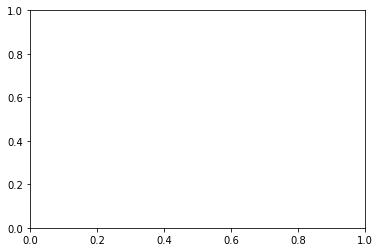

In [46]:
import matplotlib.pyplot as plt
x=[]
y=[]
for ele in ls[1]:
    x.append(ele[0])
    y.append(int(ele[1]))
plt.bar(x,y)

['保障',
 '修正',
 '修正液',
 '切勿',
 '得分',
 '擦拭',
 '橡皮',
 '橡皮擦',
 '民族',
 '不同',
 '利益',
 '只有',
 '合理',
 '宗教',
 '工作',
 '改革',
 '某地',
 '殖民',
 '注意',
 '自然',
 '降低',
 '以上',
 '密切',
 '提供',
 '二次',
 '包括',
 '哪些',
 '商品',
 '接近',
 '海岸',
 '表示',
 '公司',
 '公里',
 '功能',
 '北部',
 '命令',
 '唐代',
 '大臣',
 '思想',
 '明代',
 '盛行',
 '第二',
 '背景',
 '不得',
 '以及',
 '但是',
 '存在',
 '完成',
 '定下',
 '就是',
 '控制',
 '改善',
 '教士',
 '族群',
 '有助',
 '民生',
 '沿海',
 '生命',
 '避免',
 'gdp',
 '上升',
 '司法',
 '如何',
 '居住',
 '文明',
 '方向',
 '最大',
 '污染',
 '福利',
 '程序',
 '考量',
 '西班牙',
 '道路',
 '除了',
 '人才',
 '分析',
 '前往',
 '十七',
 '取得',
 '情形',
 '朝廷',
 '某些',
 '殖民地',
 '清末',
 '火山',
 '第一次世',
 '第二次',
 '缺乏',
 '聚落',
 '自行',
 '一般',
 '下降',
 '中央政府',
 '中海',
 '人士',
 '位置',
 '作法',
 '刑事',
 '原料',
 '地中',
 '地中海',
 '墨西哥',
 '宣布',
 '平衡',
 '引起',
 '所在',
 '提到',
 '模式',
 '正式',
 '每年',
 '看法',
 '短缺',
 '草原',
 '西哥',
 '身分',
 '追求',
 '重新',
 '防止',
 '零分',
 '一群',
 '七世',
 '不平',
 '不是',
 '之法',
 '例如',
 '依照',
 '全部',
 '刑法',
 '北宋',
 '十一',
 '十三',
 '十五',
 '外部',
 '大幅',
 '左右',
 '意志',
 '擦擦',
 '放牧',
 '新式',
 '更新',
 '更正',
 